# Importing the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Converting an array of values into a dataset matrix

In [2]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility

In [3]:
np.random.seed(7)

# load the dataset/ Importing the dataset

In [6]:
dataframe = pd.read_csv("Electric_Production.csv", usecols=[1])
dataset = dataframe.values
dataset = dataset.astype("float32")

# Normalize the dataset/Feature scaling

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Splitting the dataset into Training set and Test set

In [9]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape X=t and Y= t+1/ The matrix

In [10]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]

In [11]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, trainX.shape[1]))

# Create and fit the LSTM network

In [12]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
263/263 - 3s - loss: 0.0541 - 3s/epoch - 10ms/step
Epoch 2/100
263/263 - 1s - loss: 0.0175 - 540ms/epoch - 2ms/step
Epoch 3/100
263/263 - 1s - loss: 0.0147 - 525ms/epoch - 2ms/step
Epoch 4/100
263/263 - 1s - loss: 0.0123 - 537ms/epoch - 2ms/step
Epoch 5/100
263/263 - 1s - loss: 0.0105 - 504ms/epoch - 2ms/step
Epoch 6/100
263/263 - 1s - loss: 0.0093 - 511ms/epoch - 2ms/step
Epoch 7/100
263/263 - 1s - loss: 0.0087 - 516ms/epoch - 2ms/step
Epoch 8/100
263/263 - 1s - loss: 0.0083 - 516ms/epoch - 2ms/step
Epoch 9/100
263/263 - 1s - loss: 0.0080 - 516ms/epoch - 2ms/step
Epoch 10/100
263/263 - 1s - loss: 0.0081 - 508ms/epoch - 2ms/step
Epoch 11/100
263/263 - 1s - loss: 0.0079 - 511ms/epoch - 2ms/step
Epoch 12/100
263/263 - 1s - loss: 0.0080 - 508ms/epoch - 2ms/step
Epoch 13/100
263/263 - 1s - loss: 0.0080 - 508ms/epoch - 2ms/step
Epoch 14/100
263/263 - 1s - loss: 0.0081 - 559ms/epoch - 2ms/step
Epoch 15/100
263/263 - 1s - loss: 0.0078 - 573ms/epoch - 2ms/step
Epoch 16/100
263/263 

# Make predictions

In [13]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions

In [14]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error

In [15]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train score: %.2f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Test score: %.2f RMSE" % (testScore))

Train score: 6.47 RMSE
Test score: 8.98 RMSE


# shift train predictions for plotting

In [16]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Shift test predictions for plotting

In [17]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot baseline and predictions

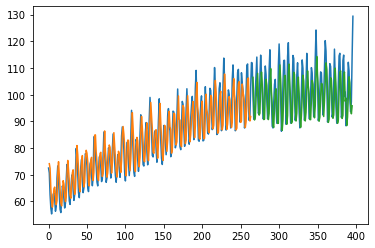

In [18]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()